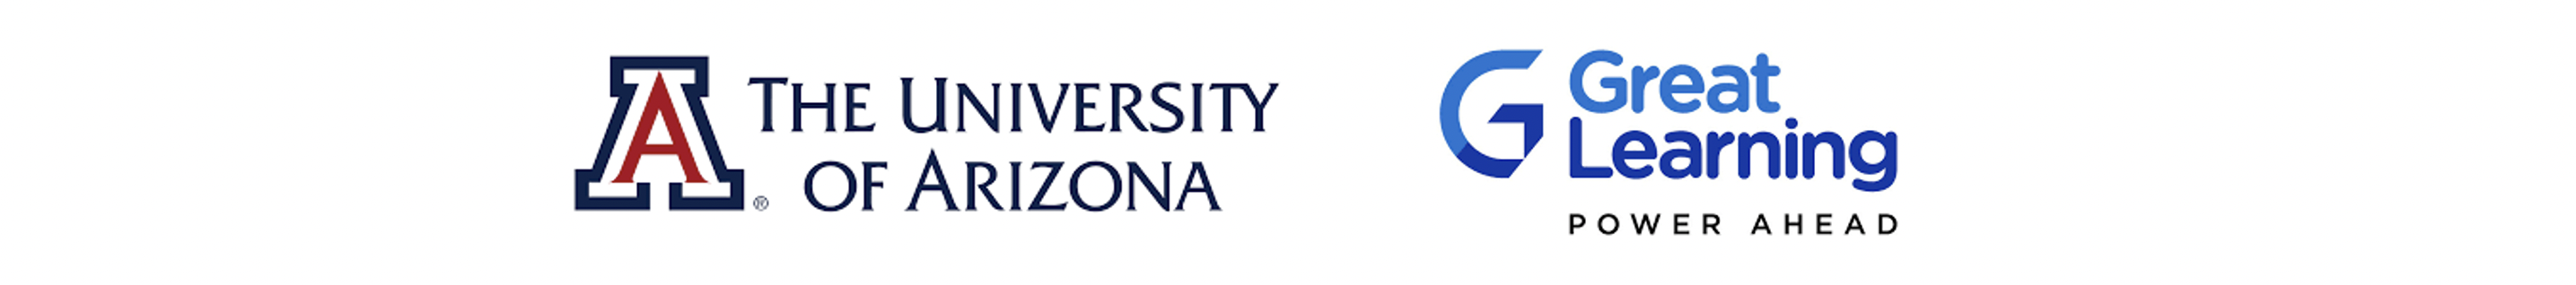

 <font color=darkblue><h1 align='center'>**Sequence Processing**</h1></font>

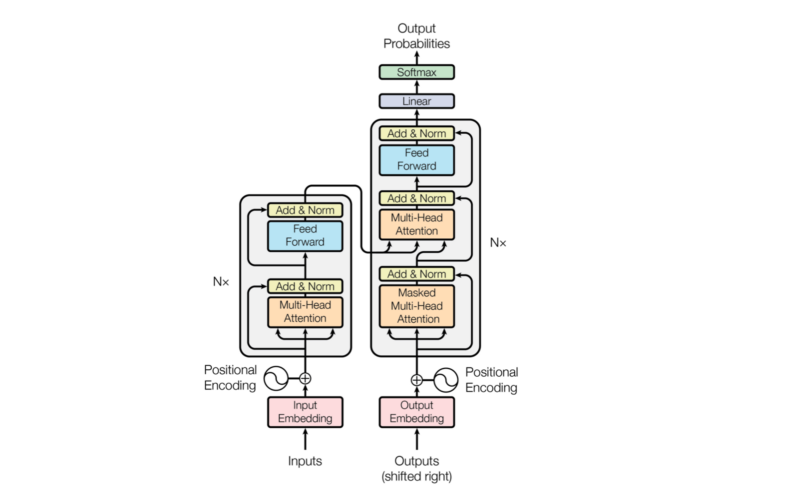

<font color=darkblue><h2>**Let's recollect some core concepts of Sequence Processing**</h2></font>

**<h3>Sequence processing involves working with sequential data, such as text, time series, or any data where the order of elements matters. Here are some core concepts in sequence processing:</h3>**==================================================================================================================================

**1. Tokenization:**
   Tokenization is the process of breaking down a sequence into smaller units called tokens. For text data, tokens are typically words or characters. Tokenization allows us to represent text data in a structured format and enables further analysis.

**2. Sequencing:**
   Sequencing refers to converting a sequence of tokens into a numerical representation. Each token is assigned a unique index or ID. This step allows the sequence to be processed by machine learning models that require numerical input.

**3. Padding:**
   Padding is the process of ensuring that all sequences have the same length. In sequence processing, sequences often have different lengths, but many machine learning models require fixed-length input. Padding involves adding zeros or a specific value to the sequences to make them equal in length.

**4. Embeddings:**
   Embeddings are dense vector representations of individual elements in a sequence, such as words or characters. Word embeddings, such as Word2Vec or GloVe, capture semantic relationships and contextual information of words. Embeddings are used to represent the tokens in a sequence as continuous vectors.

**5. Recurrent Neural Networks (RNNs):**
   RNNs are a type of neural network that can process sequential data by maintaining a hidden state that captures information from previous elements in the sequence. RNNs are designed to capture dependencies and patterns in sequential data.
   >> There are several variants of Recurrent Neural Networks (RNNs) that have been developed to improve upon the limitations of the basic RNN architecture.They enhance the capability of RNNs to model sequential data and handle long-term dependencies, making them well-suited for a wide range of NLP tasks. Here are some popular variants:
     >>>* **Bidirectional RNN:**Bidirectional RNNs process the input sequence in both forward and backward directions, capturing information from past and future contexts.
     >>>* **Gated Recurrent Unit (GRU):**GRU are another variant of RNNs that aim to solve the vanishing gradient problem and improve training efficiency by using update and reset gates.
     >>>* **Long Short-Term Memory (LSTM):**LSTMs are a variant of RNNs that address the vanishing gradient problem and can capture long-term dependencies in sequences. They have memory cells and gating mechanisms that allow them to retain and update information over longer sequences.

**6. Attention Mechanism:**
   Attention is a mechanism used in sequence processing to assign different weights or importance to different parts of the sequence. It helps the model focus on relevant elements when processing long sequences, improving the model's ability to capture important information.

**7. Sequence Labeling:**
   Sequence labeling is a task where labels are assigned to each element in a sequence. Named Entity Recognition (NER), POS tagging, sentiment analysis, and speech recognition are examples of sequence labeling tasks.

These concepts provide a foundation for understanding and working with sequential data in NLP and other domains. Implementing and combining these concepts appropriately can lead to effective sequence processing models.

<font color=darkblue><h3>**Let's see some initial and simple steps of preprocessing the input data before training a model.**</h3></font>

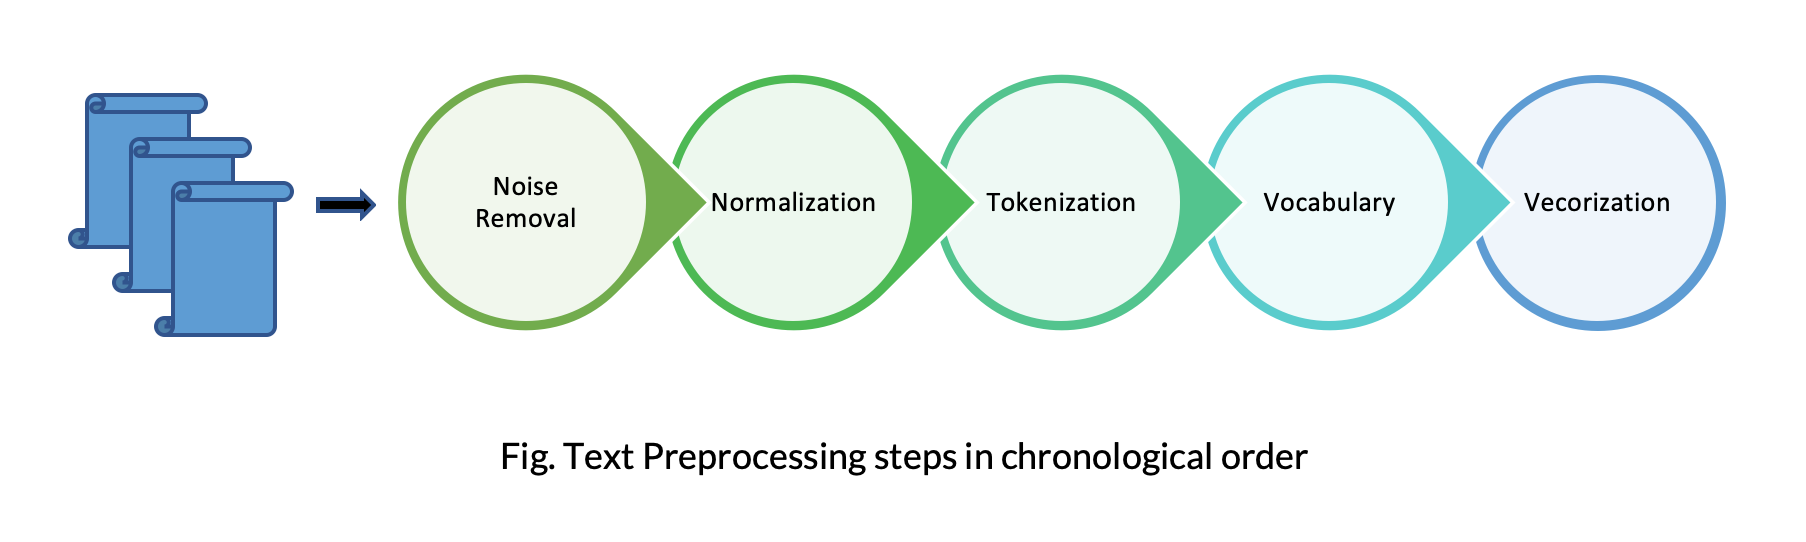

This code demonstrates the following steps:

1. Import the necessary modules from TensorFlow.
2. Define a list of sentences as the input data.
3. Create a tokenizer object and fit it on the sentences to build the word index.
4. Convert the sentences to sequences using the tokenizer.
5. Pad the sequences to ensure they have the same length using pad_sequences function.
Print the word index, sequences, and padded sequences.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example input data
sentences = [
    'I love NLP',
    'NLP is interesting',
    'TensorFlow is great for NLP'
]

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to ensure they have the same length
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Print the word index
print("Word Index:", word_index)

# Print the sequences
print("Sequences:", sequences)

# Print the padded sequences
print("Padded Sequences:\n", padded_sequences)


Word Index: {'nlp': 1, 'is': 2, 'i': 3, 'love': 4, 'interesting': 5, 'tensorflow': 6, 'great': 7, 'for': 8}
Sequences: [[3, 4, 1], [1, 2, 5], [6, 2, 7, 8, 1]]
Padded Sequences:
 [[0 0 3 4 1]
 [0 0 1 2 5]
 [6 2 7 8 1]]


<font color=darkblue><h2>**Some examples for sequence processing in Natural Language Processing (NLP) using popular libraries such as spaCy and TensorFlow. Let's explore a few common tasks:**</h2></font>

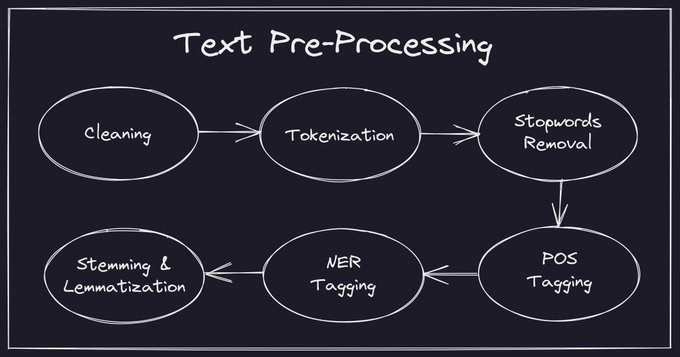

<font color=darkblue><h3 align='center'>**1. Tokenization Using spaCy: Splitting a sequence of text into individual tokens (words, punctuation marks, etc.)**</h3></font>


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = "Hello, how are you?"

doc = nlp(text)
tokens = [token.text for token in doc]

print(tokens)


['Hello', ',', 'how', 'are', 'you', '?']


<font color=darkblue><h3 align='center'>**2. Part-of-Speech (POS) Tagging using scaCy: Assigning grammatical tags to each token in a sequence.**</h3></font>

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = "I like to eat pizza."

doc = nlp(text)
pos_tags = [(token.text, token.pos_) for token in doc]

print(pos_tags)


[('I', 'PRON'), ('like', 'VERB'), ('to', 'PART'), ('eat', 'VERB'), ('pizza', 'NOUN'), ('.', 'PUNCT')]


<font color=darkblue><h3 align='center'>**3. Named Entity Recognition (NER) using spaCy: Identifying named entities such as persons, organizations, locations, etc., in a sequence.**</h3></font>


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = "Apple Inc. is headquartered in Cupertino, California."

doc = nlp(text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

print(entities)


[('Apple Inc.', 'ORG'), ('Cupertino', 'GPE'), ('California', 'GPE')]


<font color=darkblue><h3 align='center'>**4.Sentiment Analysis using TensorFlow and Keras: Determining the sentiment (positive, negative, neutral) of a sequence.**</h3></font>


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Here, we define two lists: texts contains the text sequences, and labels contains the corresponding sentiment labels.
# Assuming you have preprocessed data with text sequences and labels
texts = ["I love this movie!", "This is terrible."]
labels = [1, 0]  # Assuming 1 denotes positive sentiment and 0 denotes negative sentiment


# We create a Tokenizer object to tokenize the text sequences.The fit_on_texts() method builds the vocabulary based on the provided texts.
# The texts_to_sequences() method converts the text sequences into sequences of integers based on the vocabulary.
# The pad_sequences() function pads the sequences to ensure they have the same length.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences)


# We define a sequential model using Keras. The model consists of three layers:
# Embedding layer: It maps each integer in the sequence to a dense vector representation.
# GlobalAveragePooling1D layer: It performs average pooling over the sequence dimension, reducing the sequence length to a fixed-size representation.
# Dense layer: It is a fully connected layer with a single unit and a sigmoid activation function, which outputs the predicted sentiment probability.
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# model.compile() sets the loss function to binary cross-entropy, the optimizer to Adam, and includes accuracy as the evaluation metric.
# model.fit() trains the model on the padded sequences and the corresponding labels.
# The epochs parameter determines the number of times the model will iterate over the training data.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(padded_sequences, np.array(labels), epochs=10)


# This part, demonstrate how to use the trained model to predict sentiment for new text.
# We start by tokenizing and padding the new text in the same way as the training data.
# model.predict() generates the sentiment prediction for the new text sequence. Finally, the predicted sentiment is printed to the console.
new_text = "I love NLP!"
new_sequence = tokenizer.texts_to_sequences([new_text])
new_padded_sequence = pad_sequences(new_sequence, maxlen=len(padded_sequences[0]))

predicted_sentiment = model.predict(new_padded_sequence)
print(predicted_sentiment)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6923 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 36ms/step - loss: 0.6908 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6893 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6878 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6863 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6848 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6833 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6817 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6802 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 113ms/step
[[0.5012317]]


* The predicted sentiment probability for the new text "I love NLP!" is approximately 0.5018, which suggests a slightly positive sentiment.

Since the model is trained on a very small dataset with only two samples, achieving 100% accuracy on the training data is not surprising. However, it is essential to note that the model's performance on unseen data might be different. It is always recommended to evaluate the model on a separate validation or test dataset to get a more accurate assessment of its performance.

<font color=darkblue><h2 align='center'>**Here's an example that demonstrates how to build an RNN model for text classification using TensorFlow and Keras on IMDB data:**</h2></font>


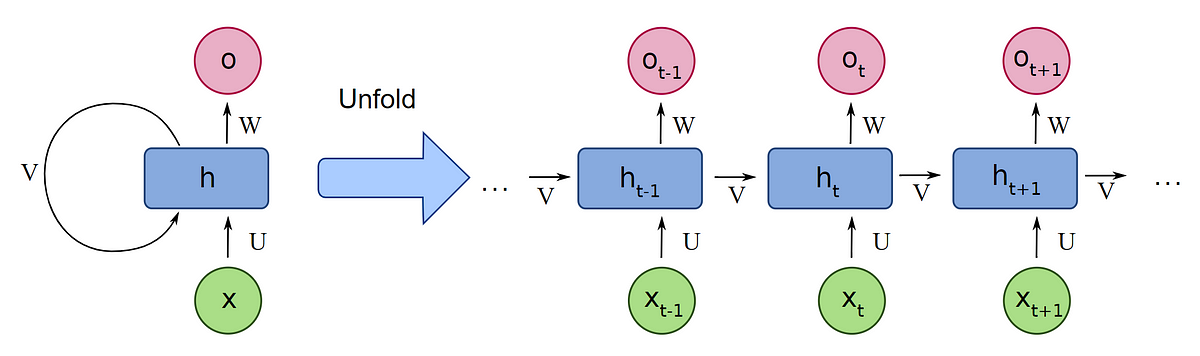

1. In this example, we use the IMDB movie review dataset available in TensorFlow's imdb module. The dataset consists of movie reviews labeled as positive or negative. We load the dataset and limit the vocabulary size to the 10,000 most frequently occurring words.

2. Next, we preprocess the data by padding the sequences to a fixed length of 100 using pad_sequences from tf.keras.preprocessing.sequence. This ensures that all input sequences have the same length.

3. Then, we build the RNN model using Sequential from tf.keras.models. The model starts with an embedding layer that maps the input sequence to a dense vector space. The LSTM layer processes the sequential data, capturing important features. Finally, a dense layer with a sigmoid activation function is added for binary classification.

4. We compile the model with binary cross-entropy loss and the Adam optimizer. The model is trained on the training data with the specified batch size and number of epochs.

5. After training, we evaluate the model on the test data and print the test loss and accuracy.

First, make sure you have TensorFlow and Keras installed on your system if you are working on Jupyter Notebook. You can install them using pip:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the IMDB movie review dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Preprocess the data
max_length = 100  # Maximum sequence length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length)

# Build the RNN model
embedding_dim = 128  # Dimensionality of the embedding space
hidden_units = 64    # Number of LSTM units

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
num_epochs = 5

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/5
391/391 [==============================] - 120s 301ms/step - loss: 0.4182 - accuracy: 0.8034 - val_loss: 0.3765 - val_accuracy: 0.8369
Epoch 2/5
391/391 [==============================] - 121s 310ms/step - loss: 0.2577 - accuracy: 0.8966 - val_loss: 0.3576 - val_accuracy: 0.8488
Epoch 3/5
391/391 [==============================] - 99s 254ms/step - loss: 0.1877 - accuracy: 0.9292 - val_loss: 0.3907 - val_accuracy: 0.8438
Epoch 4/5
391/391 [==============================] - 121s 310ms/step - loss: 0.1343 - accuracy: 0.9512 - val_loss: 0.4971 - val_accuracy: 0.8304
Epoch 5/5
782/782 [==============================] - 20s 25ms/step - loss: 0.6279 - accuracy: 0.8288
Test Loss: 0.6279304027557373
Test Accuracy: 0.8288000226020813


* In this case, the model achieved a test accuracy of approximately 0.83, which is quite good. It indicates that the model is able to classify the movie reviews in the test set with a high level of accuracy.
* The test loss of around 0.62 also suggests that the model's predictions are relatively close to the true labels in the test set.

<font color=darkblue><h2 align='center'>**Let's build a bidirectional GRU (Gated Recurrent Unit) in TensorFlow IMDB movie review dataset available in TensorFlow's IMDB module:**</h2></font>

Build A bidirectional GRU (Gated Recurrent Unit) in TensorFlow IMDB movie review dataset available in TensorFlow's imdb module

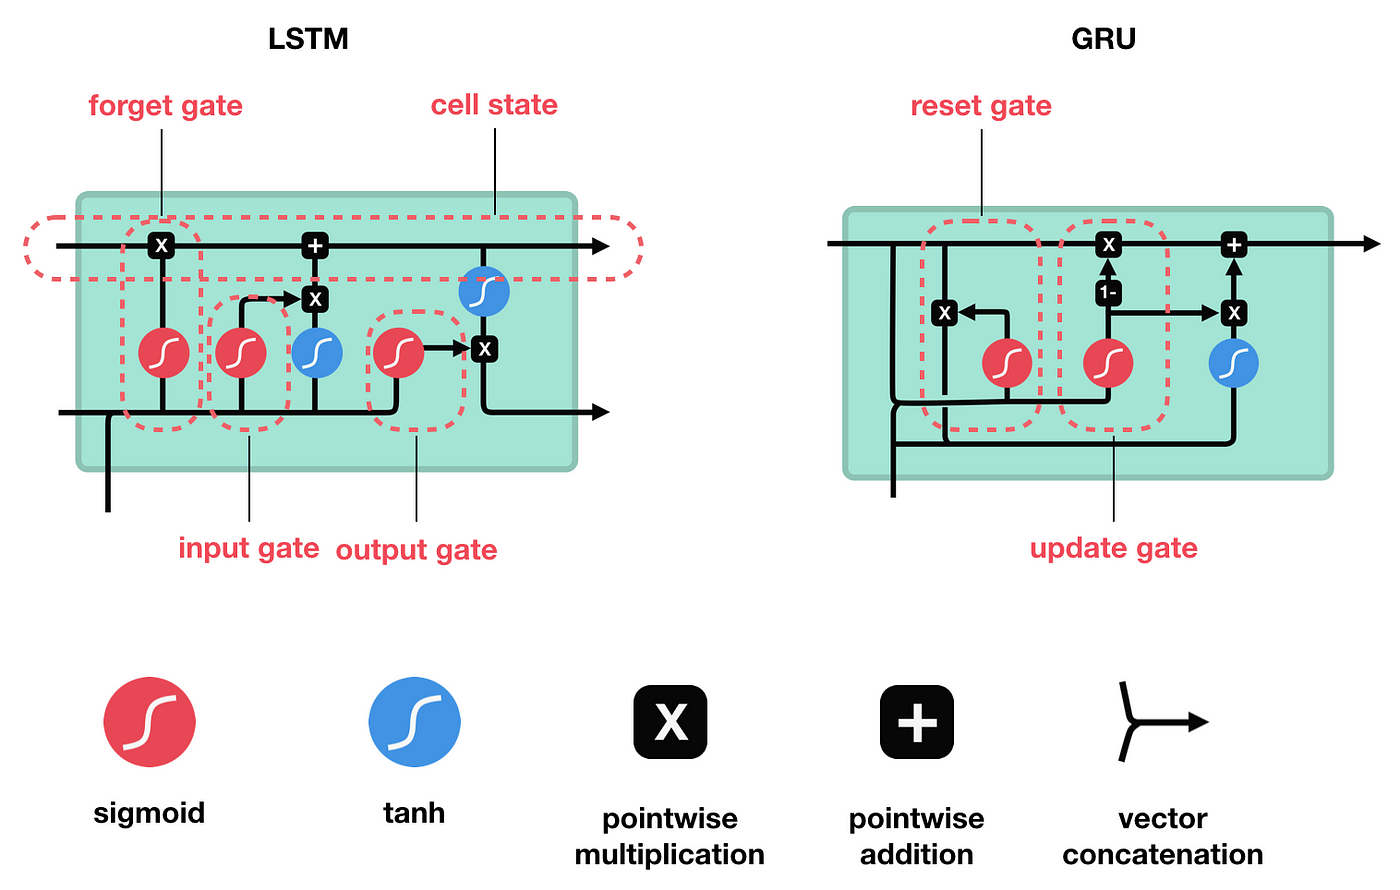

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
num_words = 10000  # Number of most frequent words to keep
maxlen = 200  # Maximum sequence length
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to a fixed length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
196/196 [==============================] - 511s 3s/step - loss: 0.4275 - accuracy: 0.7844 - val_loss: 0.3426 - val_accuracy: 0.8517
Epoch 2/5
196/196 [==============================] - 494s 3s/step - loss: 0.2233 - accuracy: 0.9135 - val_loss: 0.3205 - val_accuracy: 0.8644
Epoch 3/5
196/196 [==============================] - 498s 3s/step - loss: 0.1567 - accuracy: 0.9444 - val_loss: 0.3939 - val_accuracy: 0.8550
Epoch 4/5
196/196 [==============================] - 432s 2s/step - loss: 0.1133 - accuracy: 0.9604 - val_loss: 0.3958 - val_accuracy: 0.8537
Epoch 5/5
196/196 [==============================] - 479s 2s/step - loss: 0.0780 - accuracy: 0.9742 - val_loss: 0.4920 - val_accuracy: 0.8553


* The training process shows a decrease in the loss and an improvement in accuracy over the epochs, which suggests that the model is learning and improving its performance on the training and validation sets.

 **Let's evaluate the trained model on a test dataset and print the test loss and test accuracy.**

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

782/782 [==============================] - 98s 125ms/step - loss: 0.4920 - accuracy: 0.8553
Test Loss: 0.49196675419807434
Test Accuracy: 0.8552799820899963


* These results indicate that the trained model achieved a test accuracy of approximately 86% and a test loss of 0.4919 on the IMDB movie review dataset.

**After training the model on the IMDB dataset, we can use it to predict the sentiment of a new sentence. Here's an example of how you can make predictions using the trained model:**

In [ ]:
# Predict a new sentence
new_sentence = "This movie is fantastic!"
new_sequence = imdb.get_word_index()
new_sequence = [new_sequence[word] if word in new_sequence else 0 for word in new_sentence.split()]
new_sequence = pad_sequences([new_sequence], maxlen=maxlen)

In [ ]:
predicted_sentiment = model.predict(new_sequence)
if predicted_sentiment > 0.5:
    print("Positive sentiment")
else:
    print("Negative sentiment")

1/1 [==============================] - 0s 102ms/step
Positive sentiment


* The predicted sentiment for the given sentence is **"Positive."**

<font color=darkblue><h2 align='center'>**Here are some reference links for sequence processing and sequence labeling in natural language processing (NLP) using Python:**</h2></font>



1. TensorFlow Official Documentation: Sequence Models - This documentation provides an overview of sequence models in TensorFlow, including recurrent neural networks (RNNs), LSTM, and GRU models. It also covers sequence classification, sequence generation, and sequence labeling tasks. Link: https://www.tensorflow.org/guide/sequence_models

2. Keras Documentation: Sequence Processing with Neural Networks - This documentation focuses on sequence processing tasks using the Keras library. It covers text classification, sentiment analysis, named entity recognition, and part-of-speech tagging. Link: https://keras.io/examples/nlp/

3. Natural Language Processing with Python (NLTK) - NLTK is a popular Python library for NLP. It provides various functionalities for sequence processing and sequence labeling tasks. The NLTK book is a valuable resource for understanding these concepts. Link: https://www.nltk.org/book/

4. scikit-learn: Text Feature Extraction - scikit-learn is a widely used machine learning library in Python. This documentation page specifically covers text feature extraction techniques, which are essential for sequence processing and sequence labeling tasks. Link: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text

5. Sequence Labeling with Conditional Random Fields (CRF) - This blog post provides an introduction to sequence labeling using Conditional Random Fields (CRF) in Python. It explains the concepts and demonstrates the implementation using the sklearn-crfsuite library. Link: https://towardsdatascience.com/sequence-labeling-with-conditional-random-fields-9cddb91e0b37

These resources should provide you with a good starting point for sequence processing and sequence labeling in NLP using Python.

<font color=darkblue><h2 align='center'>**HAPPY LEARNING &#x1F60A;**</h2></font>

